### Name: Tai Ngo
### DSC-630: Predictive Analytics
### Final Project: NBA Player's Salary Prediction

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## load data

In [2]:
df = pd.read_csv("nba.csv")
df1 = pd.read_csv("nba_subset_raw.csv")
df2 = pd.read_csv("nba_subset.csv")

## EDA

In [3]:
df.head()

,Number,Season_Start,Player_Name,Salary,Position,Age,Team,Games_Played,Games_Started,Minutes_Played,...,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points
0,24304,2017,A.J. Hammons,1312611.0,C,24,DAL,22,0,163,...,0.450,8,28,36,4,1,13,10,21,48
1,24165,2017,Aaron Brooks,2116955.0,PG,32,IND,65,0,894,...,0.800,18,51,69,125,25,9,66,93,322
2,24289,2017,Aaron Gordon,5504420.0,SF,21,ORL,80,72,2298,...,0.719,116,289,405,150,64,40,89,172,1019
3,24315,2017,Aaron Harrison,365289.0,SG,22,CHO,5,0,17,...,0.500,0,3,3,3,0,0,0,2,1
4,24523,2017,Adreian Payne,2022240.0,PF,25,MIN,18,0,135,...,0.737,9,24,33,7,8,7,8,32,63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
Number                           486 non-null int64
Season_Start                     486 non-null int64
Player_Name                      486 non-null object
Salary                           484 non-null float64
Position                         486 non-null object
Age                              486 non-null int64
Team                             486 non-null object
Games_Played                     486 non-null int64
Games_Started                    486 non-null int64
Minutes_Played                   486 non-null int64
Player_Efficiency_Rating         486 non-null float64
True_Shooting_Pct                485 non-null float64
Three_Point_Attempt_Rate         485 non-null float64
Free_Throw_Rate                  485 non-null float64
Offensive_Rebound_Pct            486 non-null float64
Defensive_Rebound_Pct            486 non-null float64
Total_Rebound_Pct                486 non-null 

In [5]:
df.describe()

,Number,Season_Start,Salary,Age,Games_Played,Games_Started,Minutes_Played,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,...,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points
count,486.000000,486.0,4.840000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,485.000000,...,471.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,24392.170782,2017.0,6.717244e+06,26.405350,53.783951,25.308642,1223.051440,13.020782,0.526944,0.314058,...,0.741155,51.329218,168.962963,220.292181,114.522634,38.997942,24.041152,67.691358,100.720165,534.471193
std,171.748286,0.0,7.376188e+06,4.345194,24.835638,28.715875,842.438143,5.762420,0.089771,0.209748,...,0.139453,57.476904,148.262162,198.675410,134.125263,32.692854,29.254771,62.423127,66.589277,487.642042
min,24096.000000,2017.0,1.722400e+04,19.000000,1.000000,0.000000,1.000000,-17.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24242.250000,2017.0,1.471382e+06,23.000000,35.250000,1.000000,449.500000,9.800000,0.502000,0.156000,...,0.675000,11.000000,48.500000,64.750000,23.250000,13.000000,5.000000,20.000000,41.250000,143.000000
50%,24392.500000,2017.0,3.343830e+06,26.000000,62.500000,11.000000,1197.500000,12.800000,0.537000,0.324000,...,0.766000,31.500000,142.000000,178.000000,72.000000,33.000000,15.000000,55.000000,102.500000,434.500000
75%,24541.750000,2017.0,1.004073e+07,29.000000,75.000000,49.750000,1942.250000,15.800000,0.576000,0.455000,...,0.832000,68.750000,234.750000,305.750000,150.750000,56.750000,32.000000,98.000000,149.000000,772.750000
max,24690.000000,2017.0,3.468255e+07,40.000000,82.000000,82.000000,3048.000000,31.500000,0.799000,1.000000,...,1.000000,345.000000,817.000000,1116.000000,906.000000,157.000000,214.000000,464.000000,278.000000,2558.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C8F9957B8>,
      dtype=object)

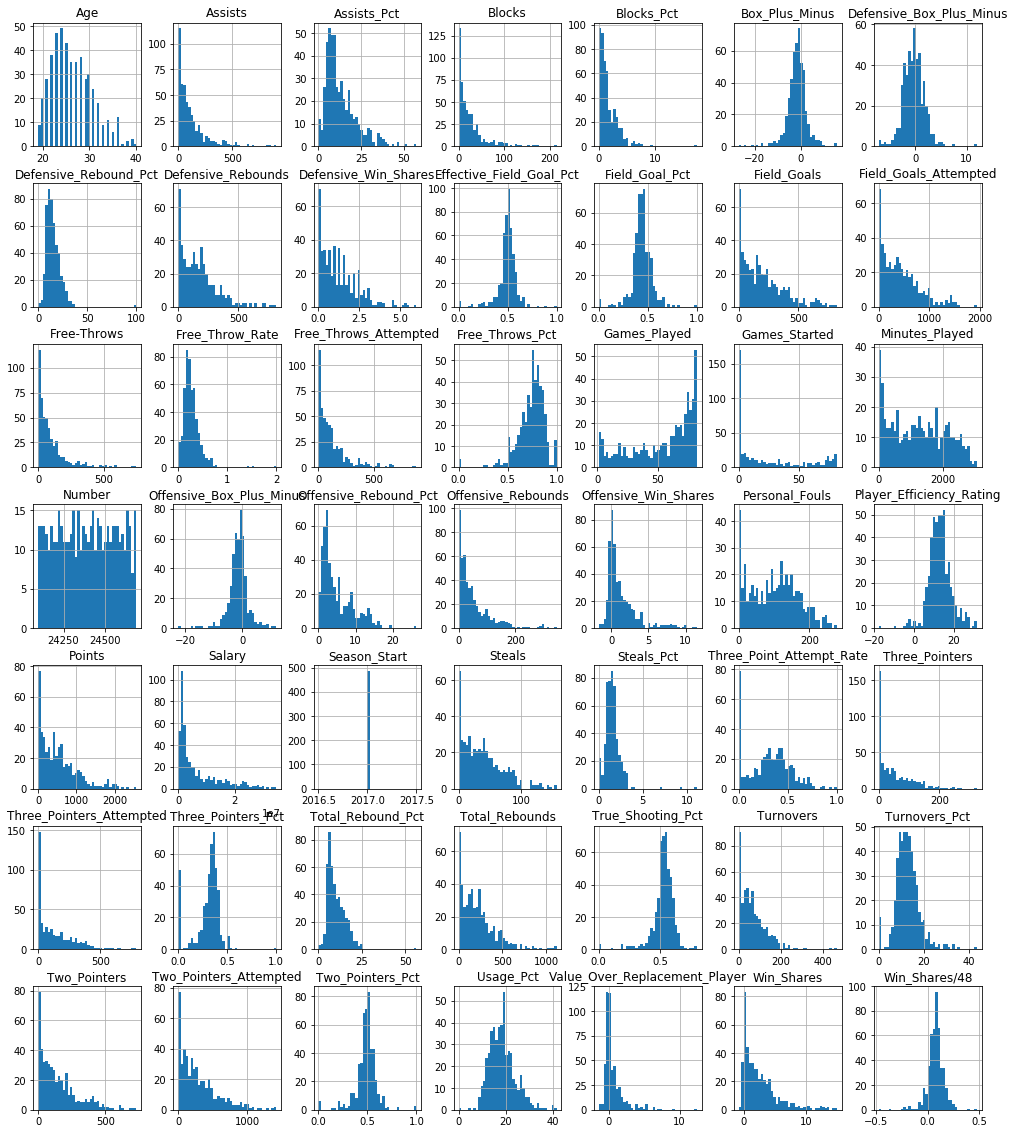

In [6]:
df.hist(bins=40, figsize=(17, 20))

### Remove rows with missing values

In [7]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 485
Data columns (total 52 columns):
Number                           438 non-null int64
Season_Start                     438 non-null int64
Player_Name                      438 non-null object
Salary                           438 non-null float64
Position                         438 non-null object
Age                              438 non-null int64
Team                             438 non-null object
Games_Played                     438 non-null int64
Games_Started                    438 non-null int64
Minutes_Played                   438 non-null int64
Player_Efficiency_Rating         438 non-null float64
True_Shooting_Pct                438 non-null float64
Three_Point_Attempt_Rate         438 non-null float64
Free_Throw_Rate                  438 non-null float64
Offensive_Rebound_Pct            438 non-null float64
Defensive_Rebound_Pct            438 non-null float64
Total_Rebound_Pct                438 non-null 

## Remove unncessary columns

In [9]:
df = df.drop(columns=["Player_Name", "Position", "Team", "Number", "Season_Start"], axis=1)

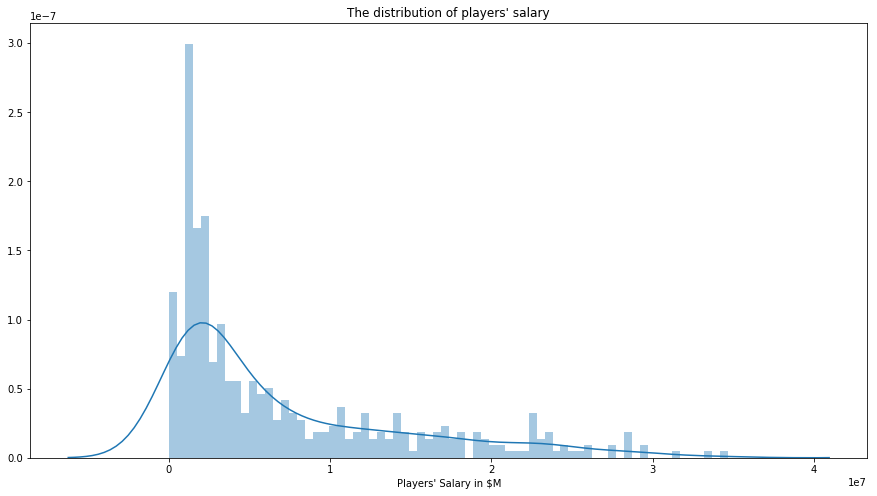

In [10]:
# plot the distribution of the target variable: salary
plt.figure(figsize=(15,8))
sns.distplot(df['Salary'], bins=70)
plt.xlabel("Players' Salary in $M")
plt.title("The distribution of players' salary")
plt.show()

## Feature Selection

## Check correlation coefficients among the features

In [11]:
# generate a confusion matrix
corr = df.corr()

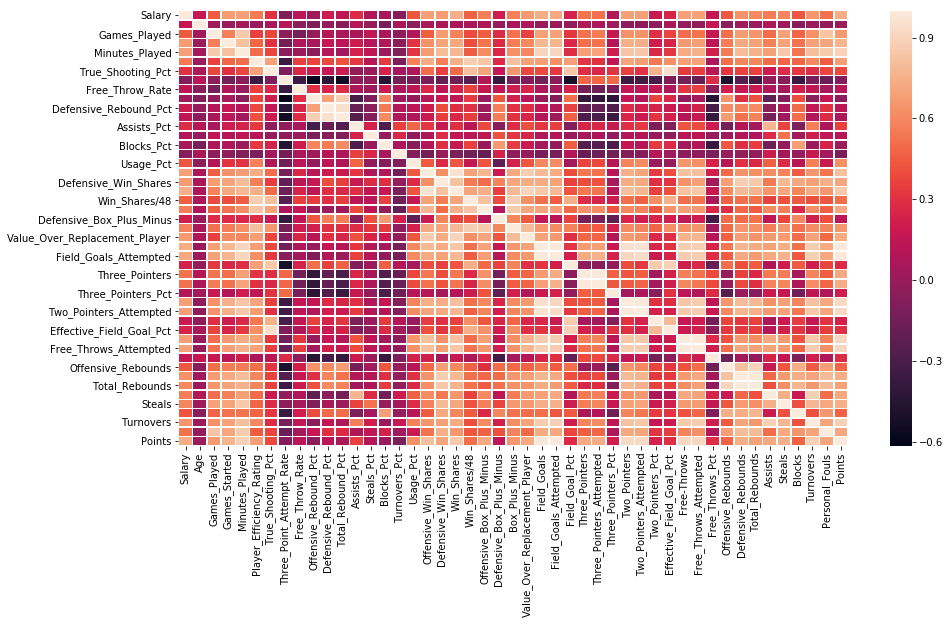

In [12]:
# plot
plt.figure(figsize=(15,8))
sns.heatmap(corr, linewidth=0.5)
plt.show()

### Remove one of two features that have correlation higher than 0.9

In [13]:
columns = np.full((corr.shape[0],), True)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = df.columns[columns]

df = df[selected_columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 485
Data columns (total 35 columns):
Salary                      438 non-null float64
Age                         438 non-null int64
Games_Played                438 non-null int64
Games_Started               438 non-null int64
Minutes_Played              438 non-null int64
Player_Efficiency_Rating    438 non-null float64
True_Shooting_Pct           438 non-null float64
Three_Point_Attempt_Rate    438 non-null float64
Free_Throw_Rate             438 non-null float64
Offensive_Rebound_Pct       438 non-null float64
Defensive_Rebound_Pct       438 non-null float64
Assists_Pct                 438 non-null float64
Steals_Pct                  438 non-null float64
Blocks_Pct                  438 non-null float64
Turnovers_Pct               438 non-null float64
Usage_Pct                   438 non-null float64
Offensive_Win_Shares        438 non-null float64
Defensive_Win_Shares        438 non-null float64
Win_Shares/48        

### The dataset has only features with correlation less than 0.9

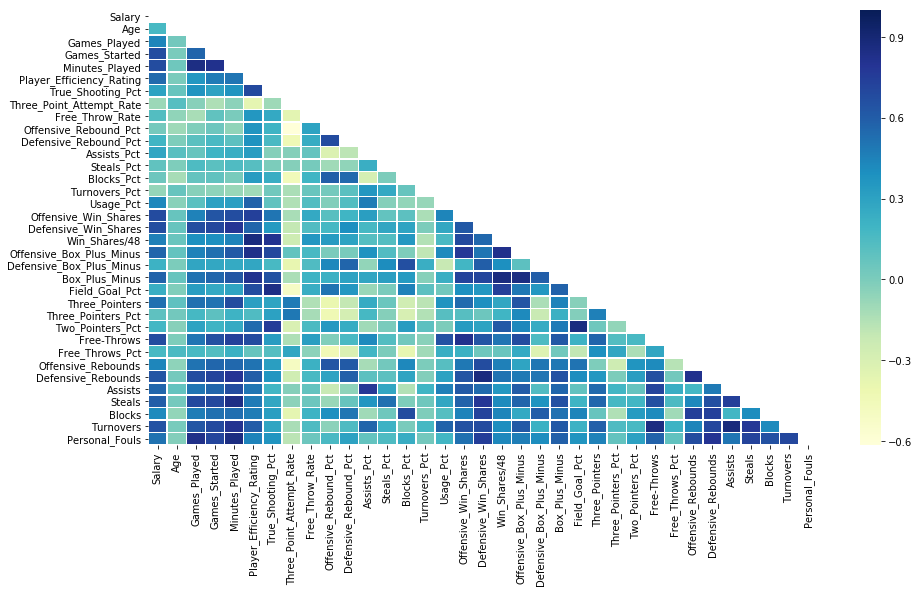

In [15]:
# see result after removing highly correlated (>0.9) features
corr = df.corr()
# plot
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidth=0.5, mask=mask, cmap="YlGnBu")
plt.show()

### Prepare features and target variable for machine learning models

In [16]:
# create a new dataframe with only selected features
df1 = pd.DataFrame(df, columns=['Age', 'Player_Efficiency_Rating', 'Blocks', 'Turnovers_Pct', 'Steals', 'Assists_Pct',
                               'Games_Started', 'Games_Played', 'Offensive_Rebounds', 'Field_Goal_Pct', 'Defensive_Box_Plus_Minus',
                               'Defensive_Rebound_Pct', 'Usage_Pct', 'Free-Throws'])

### Feature variables

In [17]:
X = df1.values

### Target variable

In [18]:
y = df['Salary'].values

### Split the data: 20% for test and 80% for train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

### Random Forest Classifier

In [20]:
# instantiate
rdc = RandomForestClassifier()

# fit
rdc.fit(X_train, y_train)

# prediction
y_pred = rdc.predict(X_train)

# check accuracy of predictions
score = accuracy_score(y_train, y_pred) * 100
print("The accuracy using Random Forest Classifier is: ",round(score,2), "%")

The accuracy using Random Forest Classifier is:  99.71 %


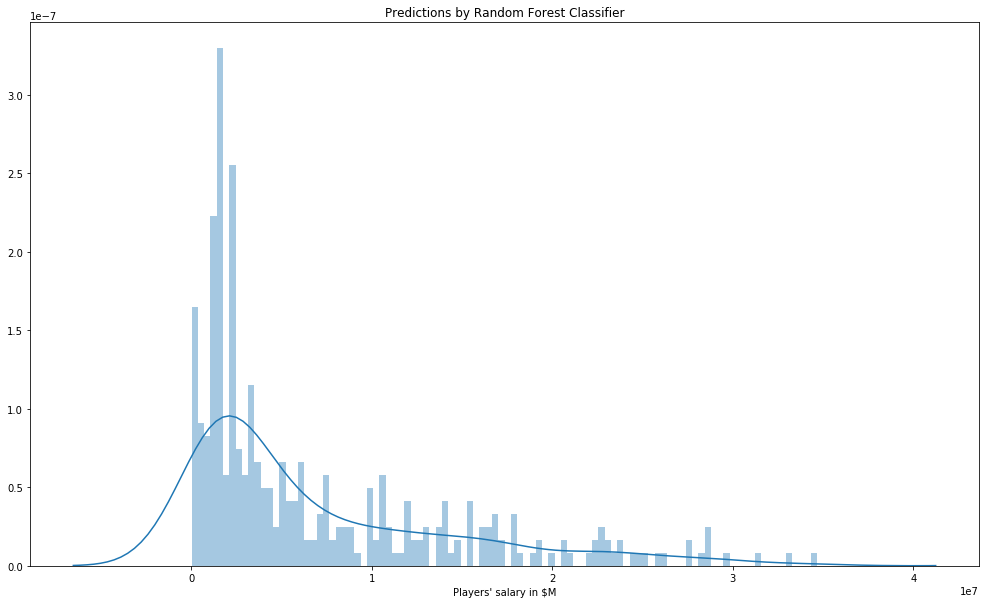

In [21]:
plt.figure(figsize=(17,10))
sns.distplot(y_pred, bins=100)
plt.title("Predictions by Random Forest Classifier")
plt.xlabel("Players' salary in $M")
plt.show()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 485
Data columns (total 14 columns):
Age                         438 non-null int64
Player_Efficiency_Rating    438 non-null float64
Blocks                      438 non-null int64
Turnovers_Pct               438 non-null float64
Steals                      438 non-null int64
Assists_Pct                 438 non-null float64
Games_Started               438 non-null int64
Games_Played                438 non-null int64
Offensive_Rebounds          438 non-null int64
Field_Goal_Pct              438 non-null float64
Defensive_Box_Plus_Minus    438 non-null float64
Defensive_Rebound_Pct       438 non-null float64
Usage_Pct                   438 non-null float64
Free-Throws                 438 non-null int64
dtypes: float64(7), int64(7)
memory usage: 51.3 KB


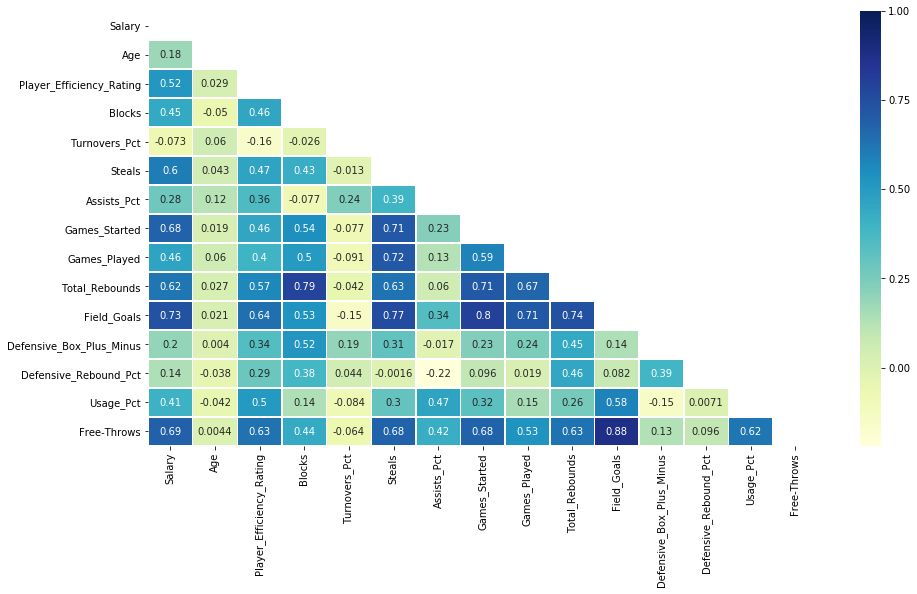

In [23]:
# see result after removing highly correlated (>0.9) features
corr = df2.corr()
# plot
plt.figure(figsize=(15,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidth=0.5, annot=True, mask=mask, cmap="YlGnBu")
plt.show()

In [24]:
df2.drop(columns='Salary').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
Age                         486 non-null float64
Player_Efficiency_Rating    486 non-null float64
Blocks                      486 non-null float64
Turnovers_Pct               486 non-null float64
Steals                      486 non-null float64
Assists_Pct                 486 non-null float64
Games_Started               486 non-null float64
Games_Played                486 non-null float64
Total_Rebounds              486 non-null float64
Field_Goals                 486 non-null float64
Defensive_Box_Plus_Minus    486 non-null float64
Defensive_Rebound_Pct       486 non-null float64
Usage_Pct                   486 non-null float64
Free-Throws                 486 non-null float64
dtypes: float64(14)
memory usage: 53.2 KB


In [25]:
X = df2.drop(columns='Salary').values
y = df2['Salary'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [27]:
# instantiate
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# fit
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)

# check accuracy of predictions
score = r2_score(y_test, y_pred)
error = explained_variance_score(y_test, y_pred)
print("The coefficient of determination for this model is: ",round(score,2))
print("The mean squared error for this model is: ",round(error,2))

The coefficient of determination for this model is:  0.35
The mean squared error for this model is:  0.41


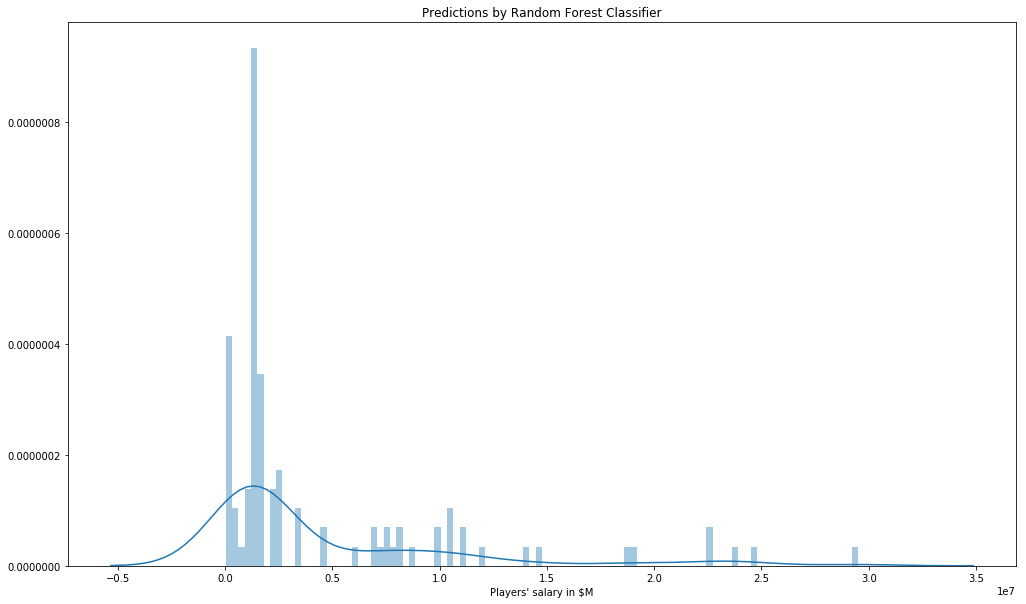

In [28]:
plt.figure(figsize=(17,10))
sns.distplot(y_pred, bins=100)
plt.title("Predictions by Random Forest Classifier")
plt.xlabel("Players' salary in $M")
plt.show()

In [29]:
dff = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dff

,Actual,Predicted
0,22434783,8000000
1,6261395,8801363
2,5500000,11000000
3,11825000,1312611
4,1825200,1312611
5,2328652,1050961
6,3300000,2550055
7,1865547,288131
8,12500000,10607169
9,8250000,100000


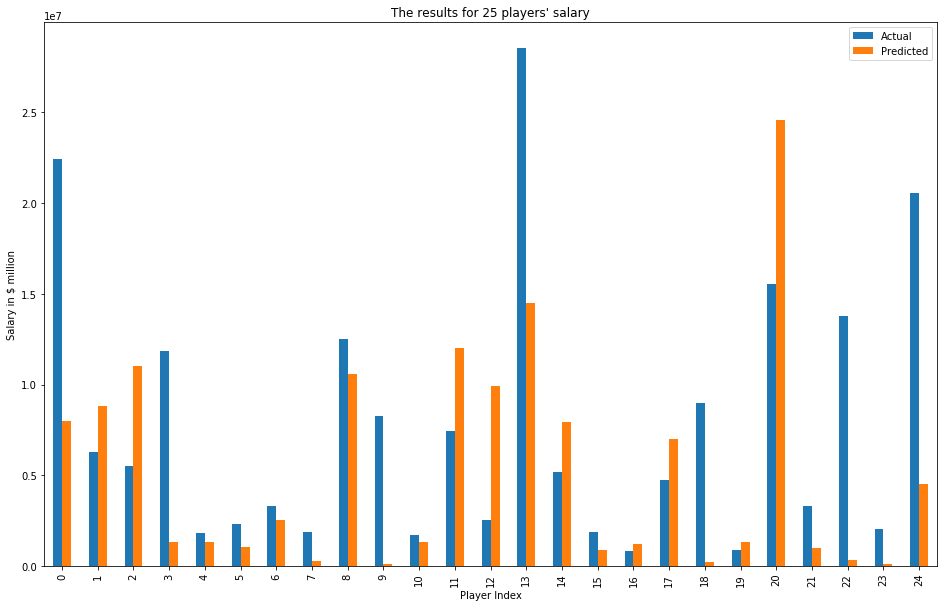

In [30]:
dff = dff.head(25)
dff.plot(kind='bar',figsize=(16,10))
plt.title("The results for 25 players' salary")
plt.xlabel("Player Index")
plt.ylabel("Salary in $ million")
plt.show()

### Linear Regression

In [31]:
# instantiate
reg = LinearRegression()

# fit
reg.fit(X_train, y_train)

# predict
y_pred = reg.predict(X_test)

# check accuracy of predictions
score = r2_score(y_test, y_pred)
error = explained_variance_score(y_test, y_pred)
print("The coefficient of determination for this model is: ",round(score,2))
print("The mean squared error for this model is: ",round(error,2))

The coefficient of determination for this model is:  0.52
The mean squared error for this model is:  0.52


In [32]:
dff = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dff

,Actual,Predicted
0,22434783,1.620657e+07
1,6261395,2.283982e+07
2,5500000,1.007353e+07
3,11825000,7.639553e+06
4,1825200,-1.551180e+05
5,2328652,6.362047e+06
6,3300000,9.595023e+06
7,1865547,6.738170e+05
8,12500000,6.699489e+06
9,8250000,3.182427e+06


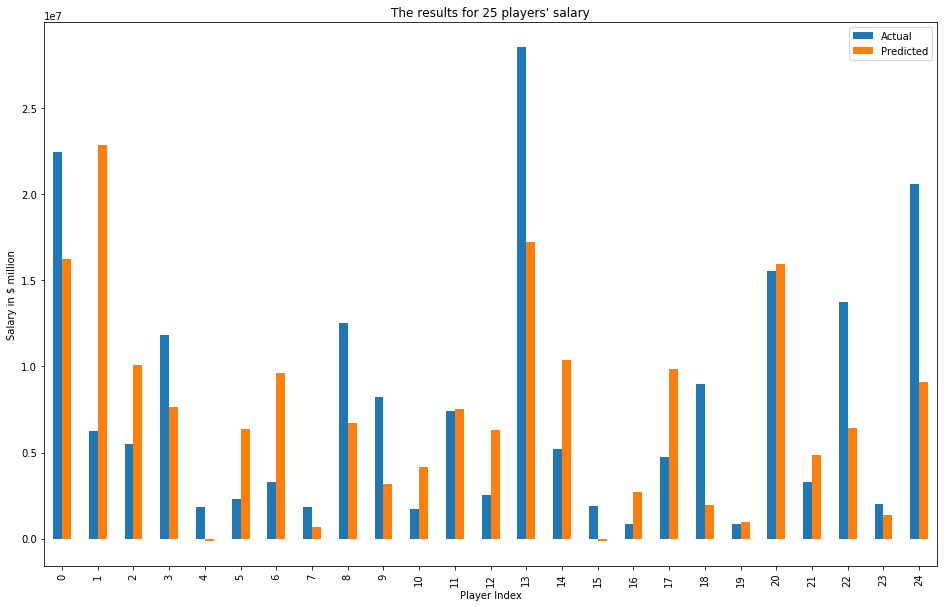

In [33]:
dff = dff.head(25)
dff.plot(kind='bar',figsize=(16,10))
plt.title("The results for 25 players' salary")
plt.xlabel("Player Index")
plt.ylabel("Salary in $ million")
plt.show()